In [ ]:
import pandas as pd
trip=pd.read_csv('/content/tripworkwiththis.csv')
trip.head()

,Unnamed: 0,Unnamed: 0.1,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0.0,0.0,0.0,1.0,1.0,0.0,25.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0.0,0.0,0.0,1.0,1.0,0.0,9.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0.0,1.0,0.0,1.0,1.0,0.0,10.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
trip.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Duration        0
Distance        0
PLong           0
PLatd           0
DLong           0
DLatd           0
Haversine       0
Pmonth          0
Pday            0
Phour           0
Pmin            0
PDweek          0
Dmonth          0
Dday            0
Dhour           0
Dmin            0
DDweek          0
Temp            0
Precip          0
Wind            0
Humid           0
Solar           0
Snow            0
GroundTemp      0
Dust            0
dtype: int64

In [ ]:
trip.shape

(185901, 27)

In [ ]:
trip.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
trip.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0.0,0.0,0.0,1.0,1.0,0.0,25.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0.0,0.0,0.0,1.0,1.0,0.0,9.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0.0,1.0,0.0,1.0,1.0,0.0,10.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


WE OBSERVE THAT LATITUDE VALUES ARE GREATER THAN 90 DEGREE AND LONGITUDE VALUES ARE WITHIN 90 DEGREE,IN THEORY IT IS ACTUALLY OPPOSITE

In [ ]:
trip.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901,185901
mean,18.3129,2649.53,37.5481,126.984,37.5478,126.984,1.53584,1.15491,12.8219,13.1461,29.3223,2.73118,1.15514,12.8223,13.2795,30.2792,2.73151,-2.86175,0.00613283,1.96117,45.3185,0.30813,0.159863,-2.09131,43.1867
std,20.3179,2978.55,0.0397401,0.0742409,0.0396272,0.0742359,1.54857,0.36182,8.85014,6.11915,17.2985,1.95169,0.362036,8.84747,6.19824,17.3638,1.95183,5.7537,0.115099,1.11795,15.6357,0.465327,0.468925,3.74263,23.3612
min,2,10,37.4433,126.799,37.4433,126.799,0,1,1,0,0,0,1,1,0,0,0,-17.8,0,0.2,17,0,0,-13.6,3
25%,6,1020,37.5207,126.922,37.5206,126.921,0.666368,1,5,8,14,1,1,5,8,15,1,-7,0,1,33,0,0,-4.2,27
50%,11,1700,37.5527,126.98,37.5516,126.981,1.07475,1,12,14,29,3,1,12,14,30,3,-2.3,0,1.8,43,0.01,0,-0.7,38
75%,22,3050,37.5732,127.047,37.573,127.047,1.87334,1,20,18,44,4,1,20,18,46,4,1.6,0,2.7,56,0.54,0,0,55
max,119,33270,37.6897,127.178,37.6897,127.178,21.323,2,31,23,59,6,2,31,23,59,6,8.5,3.3,6.7,96,2.3,3.5,7.5,169


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


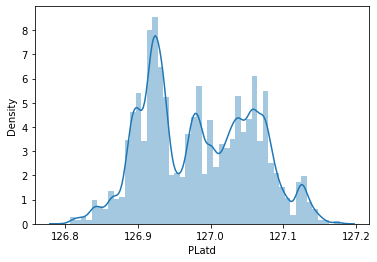

In [ ]:
sns.distplot(trip['PLatd'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


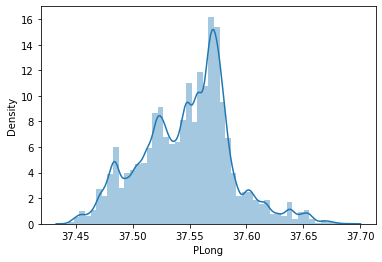

In [ ]:
sns.distplot(trip['PLong'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


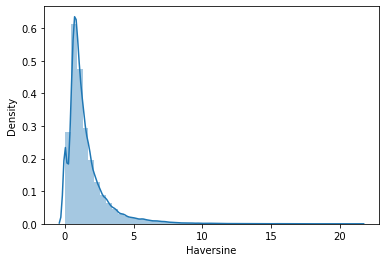

In [ ]:
sns.distplot(trip['Haversine'])

INTERCHANGING LATITUDE AND LONGITUDE COLUMNS

In [ ]:
trip[['PLatd','PLong']] = trip[['PLong','PLatd']]
trip[['DLatd','DLong']] = trip[['DLong','DLatd']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


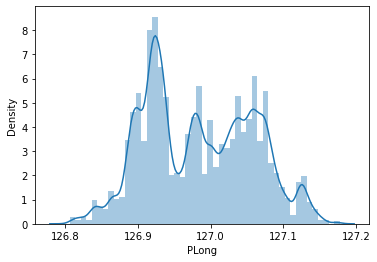

In [ ]:
sns.distplot(trip['PLong'])

In [ ]:
trip.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,126.888359,37.544666,126.888359,37.544666,0.000000,1,1,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,127.003944,37.506199,127.035103,37.551250,5.713529,1,1,0.0,0.0,0.0,1.0,1.0,0.0,25.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,127.057083,37.544590,127.061096,37.537014,0.913702,1,1,0.0,0.0,0.0,1.0,1.0,0.0,9.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,127.023560,37.571102,127.034920,37.561447,1.468027,1,1,0.0,1.0,0.0,1.0,1.0,0.0,10.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,127.015907,37.573242,127.016403,37.565849,0.823227,1,1,0.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [ ]:
pip install haversine

In [ ]:
trip['PLatd'][1]

37.506199

In [ ]:
from haversine import haversine, Unit

a=(trip['PLatd'][2],trip['PLong'][2])
b=(trip['DLatd'][2],trip['PLong'][2])

haversine(a,b)



0.8424139278493638

In [ ]:
from math import radians, cos, sin, asin, sqrt

def calc_haversine(lon1, lat1, lon2, lat2, is_deg=True):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    if is_deg:
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = (sin(dlat/2)**2) + ((cos(lat1) * cos(lat2)) * sin(dlon/2)**2)
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
a=trip.iloc[2,2]

In [ ]:
a

127.057083

RECALCULATING HAVERSINE BASED ON NEWLY CALCULATED LONGITUDE AND LATITUDE





In [ ]:
for index in range(len(trip)):

  a=trip.iloc[index,2]
  b=trip.iloc[index,3]
  c=trip.iloc[index,4]
  d=trip.iloc[index,5]
  trip.iloc[index,6]=calc_haversine(a,b,c,d)

In [ ]:
trip.Haversine.value_counts()

0.000000    13921
0.936969      493
0.621548      437
0.834277      399
0.694158      386
            ...  
1.902086        1
6.417852        1
2.260710        1
2.798463        1
4.961163        1
Name: Haversine, Length: 25310, dtype: int64

In [ ]:
trip.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,126.888359,37.544666,126.888359,37.544666,0.000000,1,1,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,127.003944,37.506199,127.035103,37.551250,5.713521,1,1,0.0,0.0,0.0,1.0,1.0,0.0,25.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,127.057083,37.544590,127.061096,37.537014,0.913700,1,1,0.0,0.0,0.0,1.0,1.0,0.0,9.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,127.023560,37.571102,127.034920,37.561447,1.468025,1,1,0.0,1.0,0.0,1.0,1.0,0.0,10.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,127.015907,37.573242,127.016403,37.565849,0.823226,1,1,0.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


We see that even with the absence of null values, a lot of columns has "0" values

In [ ]:
(trip == 0.00).sum()

Duration           0
Distance           0
PLong              0
PLatd              0
DLong              0
DLatd              0
Haversine      13921
Pmonth             0
Pday               0
Phour           5628
Pmin            2984
PDweek         30399
Dmonth             0
Dday               0
Dhour           5363
Dmin            3056
DDweek         30386
Temp            1334
Precip        184626
Wind               0
Humid              0
Solar          88021
Snow          155142
GroundTemp     20944
Dust               0
dtype: int64

PREPROCESSING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Columns Precip and Snow have huge no of 0 values and also they have negative correlation with the target,so we can drop these columns

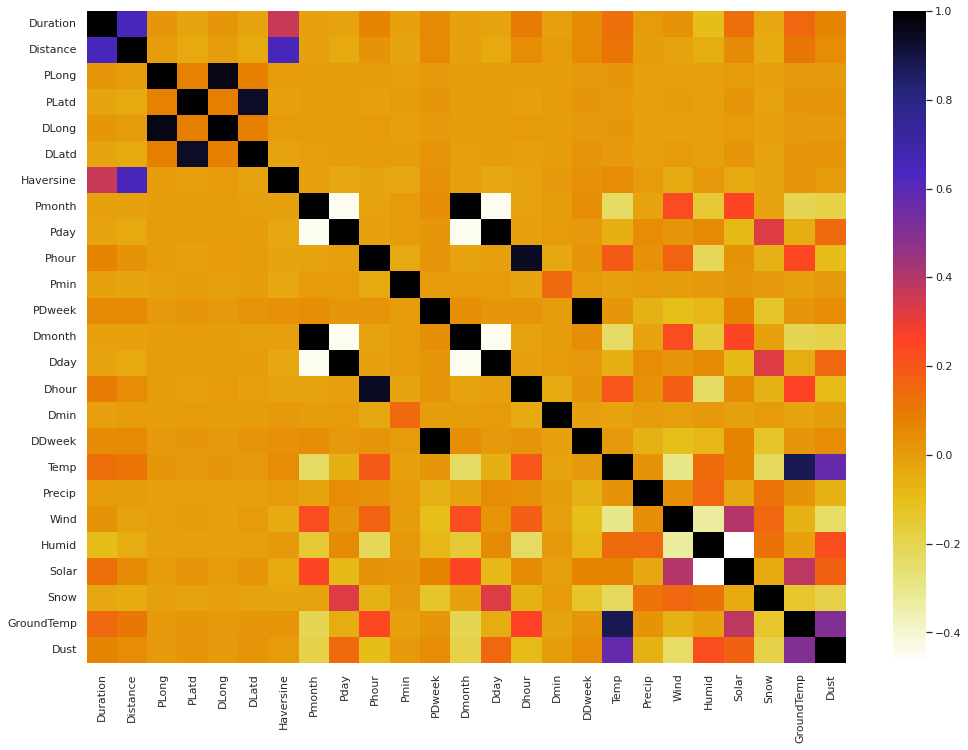

In [ ]:

sns.set()
plt.figure(figsize=(17,12))
sns.heatmap(trip.corr(), annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
trip.drop(columns=["Precip","Snow"],inplace=True)

In [ ]:
trip.shape

(185901, 25)

REMOVING EXACT DUPLICATE COLUMNS

In [ ]:
trip.drop_duplicates(keep='first',inplace=True)

In [ ]:
trip.duplicated().sum()

0

In [ ]:
import numpy as np

In [ ]:
ids = list(np.where(trip["Haversine"] == 0.00)[0])
len(ids)

13917

DROPPING LATITUDE LONGITUDE COLUMNS AS WE ALREADY HAVE HAVERSINE COLUMN WHICH IS CALCULATED USING THEM

In [ ]:
trip.drop(labels=['PLatd','PLong','DLatd','DLong'],axis=1,inplace=True)


WE DO NOT DROP DUST,WIND,HAVERSINE AND SOLAR COLUMNS ALTHOUGH THEY HAVE QUITE A HIGH NO OF 0 VALUES BEACUSE THEY ARE MODERATE TO HIGHLY CORRELATED WITH OUR TARGET DURATION,WE ONLY DROP THOSE WHERE ATLEAST ONE OF THESE COLUMNS 

In [ ]:
trip=trip.loc[trip['Dust']*trip['Wind']*trip['Haversine']*trip['Solar']!=0]

In [ ]:
(trip == 0.00).sum()

Duration          0
Distance          0
Haversine         0
Pmonth            0
Pday              0
Phour             0
Pmin           1374
PDweek        13794
Dmonth            0
Dday              0
Dhour             1
Dmin           1455
DDweek        13794
Temp            505
Precip        87235
Wind              0
Humid             0
Solar             0
Snow          73322
GroundTemp     9460
Dust              0
dtype: int64

In [ ]:
trip.reset_index(drop=True,inplace=True)

In [ ]:
trip.head()


,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,72,13620,3.951102,1,1,9.0,0.0,0.0,1.0,1.0,10.0,12.0,0.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
1,4,1130,0.864266,1,1,9.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
2,30,6850,3.787670,1,1,9.0,1.0,0.0,1.0,1.0,9.0,31.0,0.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
3,4,1080,0.705525,1,1,9.0,1.0,0.0,1.0,1.0,9.0,6.0,0.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
4,3,630,0.540024,1,1,9.0,1.0,0.0,1.0,1.0,9.0,5.0,0.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0


LET US EXAMINE THE TIME VARIABLES

In [ ]:
ids = list(np.where(trip['Pmonth']!=trip['Dmonth'])[0])
len(ids)

0

In [ ]:
ids = list(np.where(trip['Pday']!=trip['Dday'])[0])
len(ids)

2

In [ ]:
ids = list(np.where(trip['PDweek']!=trip['DDweek'])[0])
len(ids)

2

In [ ]:
ids = list(np.where(trip['Phour']!=trip['Dhour'])[0])
len(ids)

24946

Dropping Day, Month and Min variables of **drop** context, as the   
entire circulation is within the same city, and these columns become **repetitive**

In [ ]:
trip.drop(labels=['Pmonth','Pday','Pmin','Dmonth','Dday','Dmin'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NOT DROPPING ALL TIME COLUMNS

In [ ]:
trip.drop(labels=["Dday", "Dmonth", "DDweek"], axis=1, inplace=True)
trip

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dhour,Dmin,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,72,13620,3.951102,1,1,9.0,0.0,0.0,10.0,12.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
1,4,1130,0.864266,1,1,9.0,0.0,0.0,9.0,5.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
2,30,6850,3.787670,1,1,9.0,1.0,0.0,9.0,31.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
3,4,1080,0.705525,1,1,9.0,1.0,0.0,9.0,6.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
4,3,630,0.540024,1,1,9.0,1.0,0.0,9.0,5.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87786,5,1150,1.022343,2,7,17.0,11.0,2.0,17.0,17.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87787,4,1010,0.813020,2,7,17.0,11.0,2.0,17.0,16.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87788,6,1020,0.775532,2,7,17.0,11.0,2.0,17.0,19.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87789,7,990,0.652300,2,7,17.0,11.0,2.0,17.0,19.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0


In [ ]:
trip

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dhour,Dmin,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,72,13620,3.951102,1,1,9.0,0.0,0.0,10.0,12.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
1,4,1130,0.864266,1,1,9.0,0.0,0.0,9.0,5.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
2,30,6850,3.787670,1,1,9.0,1.0,0.0,9.0,31.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
3,4,1080,0.705525,1,1,9.0,1.0,0.0,9.0,6.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
4,3,630,0.540024,1,1,9.0,1.0,0.0,9.0,5.0,-4.3,0.0,0.7,39.0,0.15,0.0,-3.6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87786,5,1150,1.022343,2,7,17.0,11.0,2.0,17.0,17.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87787,4,1010,0.813020,2,7,17.0,11.0,2.0,17.0,16.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87788,6,1020,0.775532,2,7,17.0,11.0,2.0,17.0,19.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0
87789,7,990,0.652300,2,7,17.0,11.0,2.0,17.0,19.0,-2.3,0.0,2.2,20.0,0.77,0.0,-0.4,38.0


In [ ]:
trip['DDweek'].value_counts()

1.0    14470
4.0    13914
0.0    13794
2.0    12613
3.0    11853
5.0    11012
6.0    10135
Name: DDweek, dtype: int64

In [ ]:
trip.to_csv("tripforfeatureeng.csv");